In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm

# 7. Ten Coin Flips Revisited: Beta Plots*

From [Unit 4: betaplots.m](https://raw.githubusercontent.com/areding/6420-pymc/main/original_examples/Codes4Unit4/betaplots.odc).

The professor goes back to the [Ten Coin Flips](../unit2/Unit2-10flips) example from Unit 2. A coin was flipped ten times, coming up tails each time. We have no reason to believe it is a trick coin. Frequentist methods came up with an estimate of $p = 0$ for the probability of the next flip, since they depend only on the data we've collected so far. But when we put a uniform prior on $p$, we came up with a posterior probability of $1/12$.

In this lecture, we take a look at the more expressive [Beta distribution](content:beta_dist). Describing this distribution are the shape parameters $\alpha$ and $\beta$, which interact to define the mean at $\frac{\alpha}{\alpha+\beta}$. Beta priors are conjugate with the binomial likelihood, so they fit naturally here. 

```{admonition} See also
Example 8.4, {cite:t}`vidakovic2017engineering` p. 341.
```

First, take a look at some plots of various beta distributions.

/var/folders/pm/9z29qnf508bc1v6q8fksblm40000gn/T/ipykernel_27241/1374941424.py:26: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 2, i + 1, autoscalex_on=False)


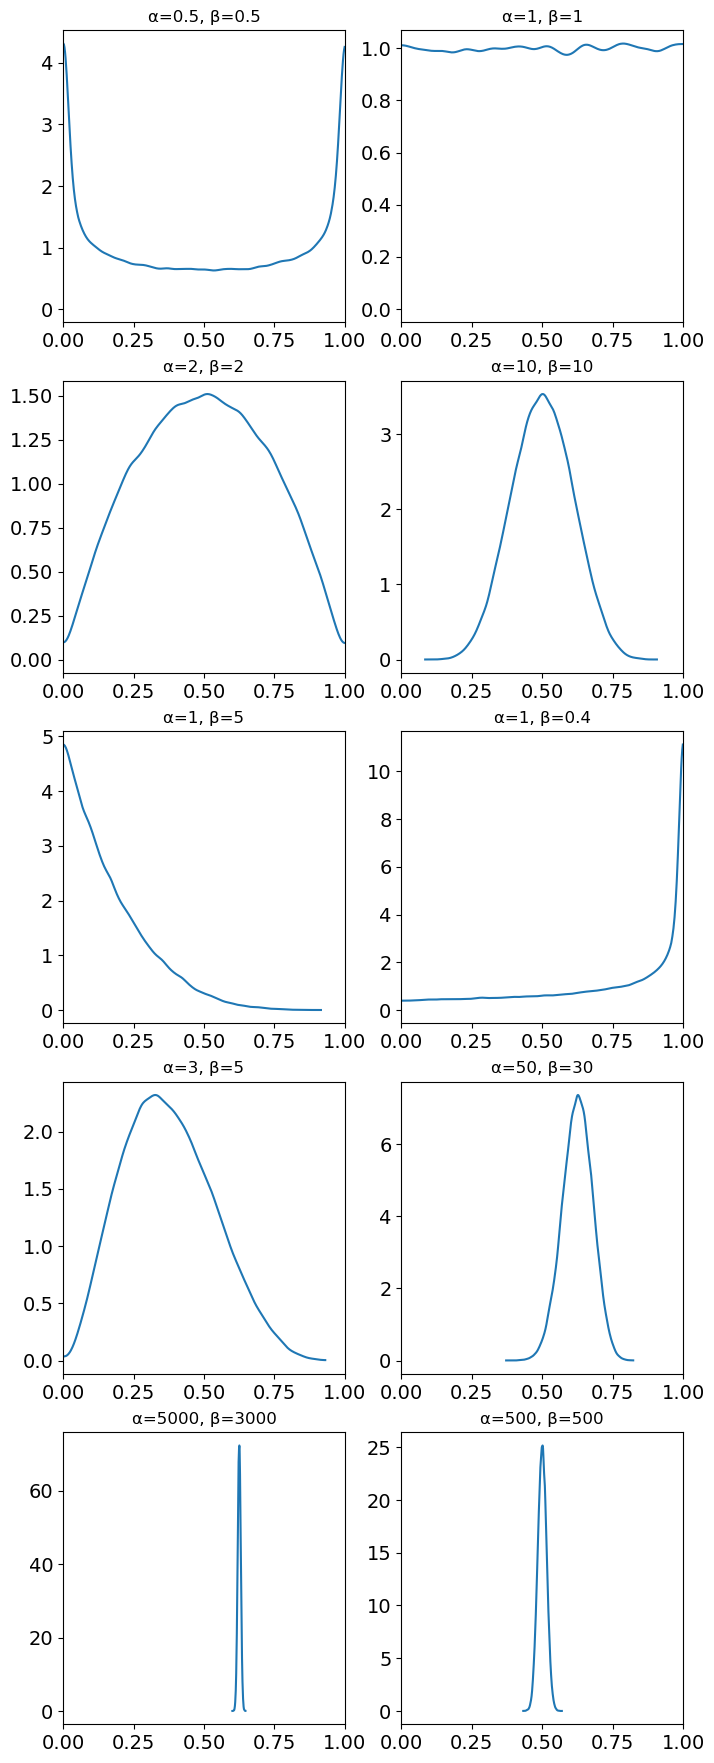

In [5]:
params = [
    (0.5, 0.5),
    (1, 1),
    (2, 2),
    (10, 10),
    (1, 5),
    (1, 0.4),
    (3, 5),
    (50, 30),
    (5000, 3000),
    (500, 500),
]


def beta_dist(α, β, n):
    """
    Return n samples from a Beta(α, β) dist. along with a name string.
    """
    name = f"{α=}, {β=}"
    return pm.draw(pm.Beta.dist(α, β), n), name


n = 100000
distributions = [beta_dist(α, β, n) for α, β in params]

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(8, 22), sharex="col")

for i, dist in enumerate(distributions):
    plt.subplot(5, 2, i + 1, autoscalex_on=False)
    az.plot_dist(dist[0], figsize=(2, 2))
    plt.title(dist[1])

plt.xlim(0, 1)
plt.show()

The professor decides on $Be(500, 500)$ as a realistic fair coin prior, with the density heavily concentrated at the mean of $.50$. So our model looks like this:

$$
\begin{align*}
X | p &\sim Bin(10, p) \\
p &\sim Be(500, 500)
\end{align*}
$$

We know $x=0, n=10$. Then: 

$$
\begin{align*}
p \mid X &\sim Be(x + \alpha, n - x + \beta) \\
&\sim Be(500, 10 + 500) \\ 
&\sim Be(500, 510)
\end{align*}
$$

Our Bayes estimator is $\frac{\alpha}{\alpha+\beta} = \frac{500}{500+510} = .495$. So with this extremely strong prior expressing our belief that the coin was fair, ten tails-up flips in a row barely nudges our posterior belief. Try it with some different priors and see what you get!

You'll notice this doesn't look quite the same as in the [conjugate table](content:conjugate_table). That's because the conjugate table version is more general: there, $m$ is the same as $n$ in this example. Then the table version's $n$ is the number of binomial experiments. Say you had run 3 experiments of 10 flips each. Then $m$ would be 10, and $n$ would be 3. You would have 3 $x$ values, one for each experiment.

```{admonition} See also
Check out https://colcarroll.github.io/updating_beta/ for a nice visualization of the beta distribution.
```

In [5]:
%load_ext watermark
%watermark -n -u -v -iv -p pytensor

Last updated: Sat Mar 18 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.9.0

pytensor: 2.10.1

pymc      : 5.1.1
arviz     : 0.14.0
numpy     : 1.24.2
matplotlib: 3.6.3

